#### 이산확률변수의 상호정보량

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mutual_info_score

categories = ['rec.autos', 'sci.med', 'rec.sport.baseball']
newsgroups = fetch_20newsgroups(subset='train', categories=categories)
vect = CountVectorizer(stop_words="english", token_pattern="[a-zA-Z]+")
X = vect.fit_transform(newsgroups.data).toarray()
y = newsgroups.target

mi = np.array([mutual_info_score(X[:, i], y) for i in range(X.shape[0])])
plt.stem(mi, use_line_collection=True)
plt.xlabel("키워드 번호")
plt.title("뉴스그룹 카테고리와 키워드 사이의 상호정보량")
plt.show()

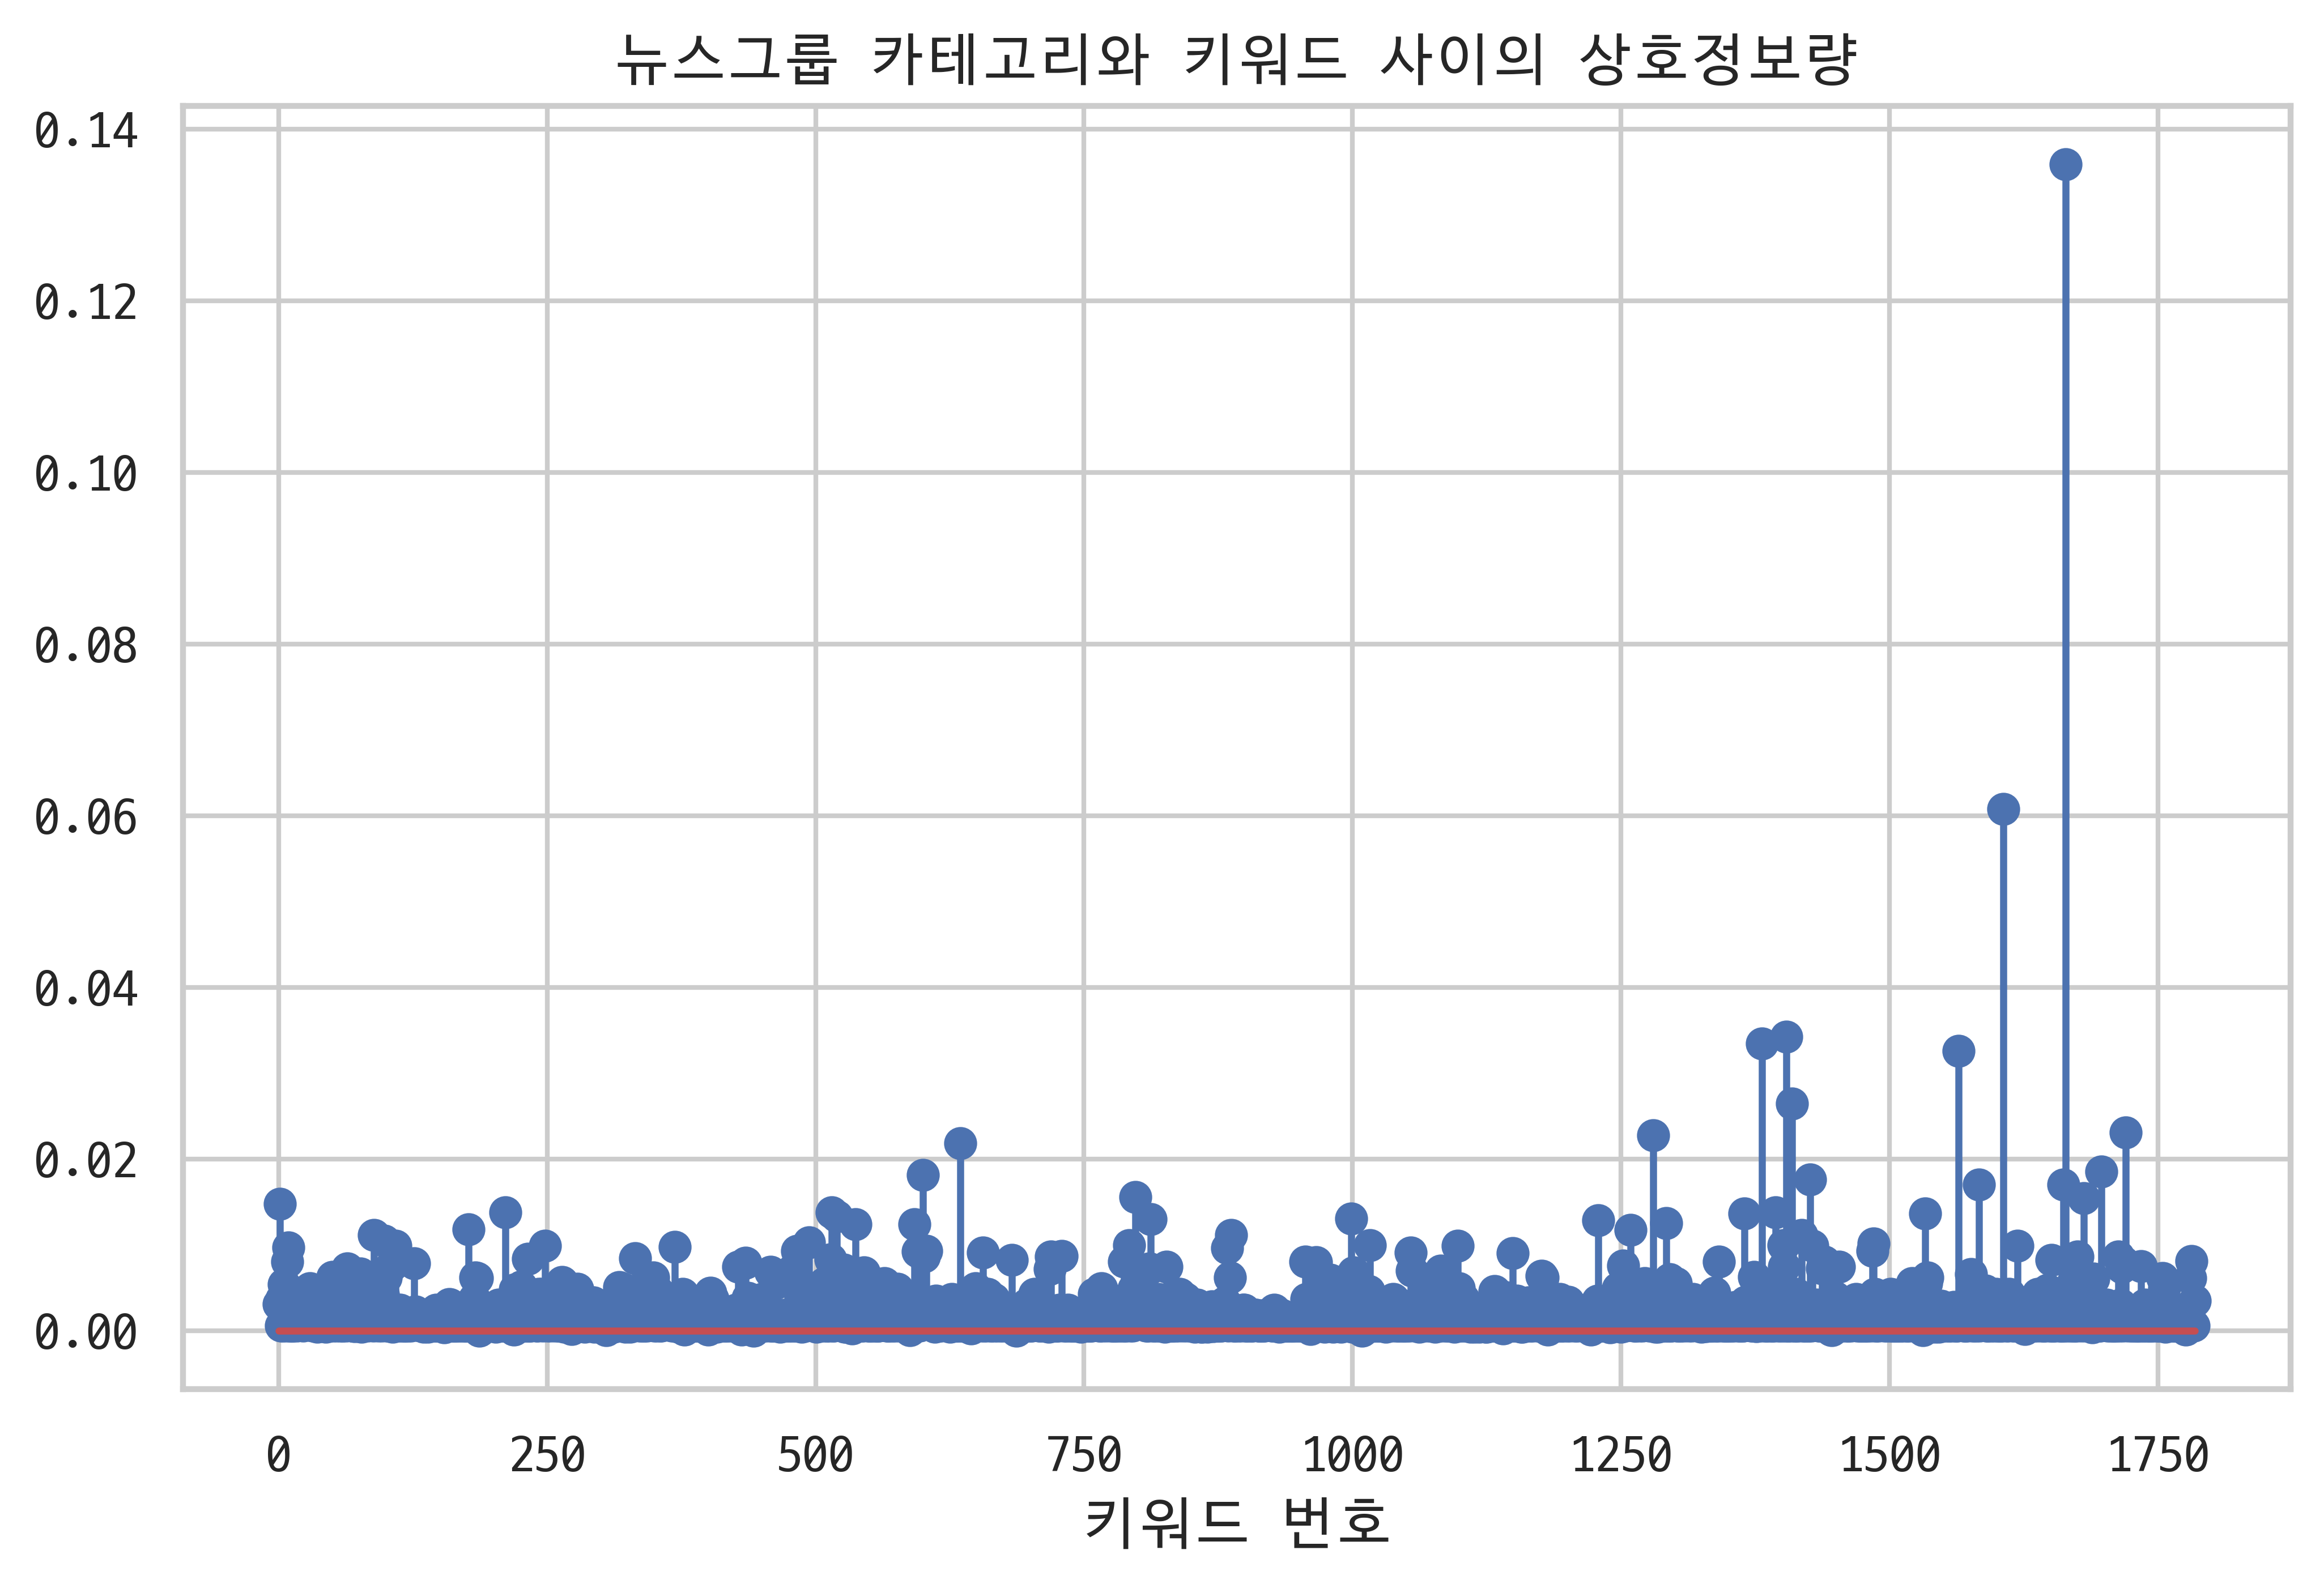

In [2]:
# same as above

In [3]:
inv_vocabulary = {v: k for k, v in vect.vocabulary_.items()}
idx = np.flip(np.argsort(mi))
[inv_vocabulary[idx[i]] for i in range(10)]

['baseball',
 'banks',
 'automotive',
 'auto',
 'ball',
 'autos',
 'batting',
 'atlanta',
 'alomar',
 'bat']

#### 최대정보 상관계수

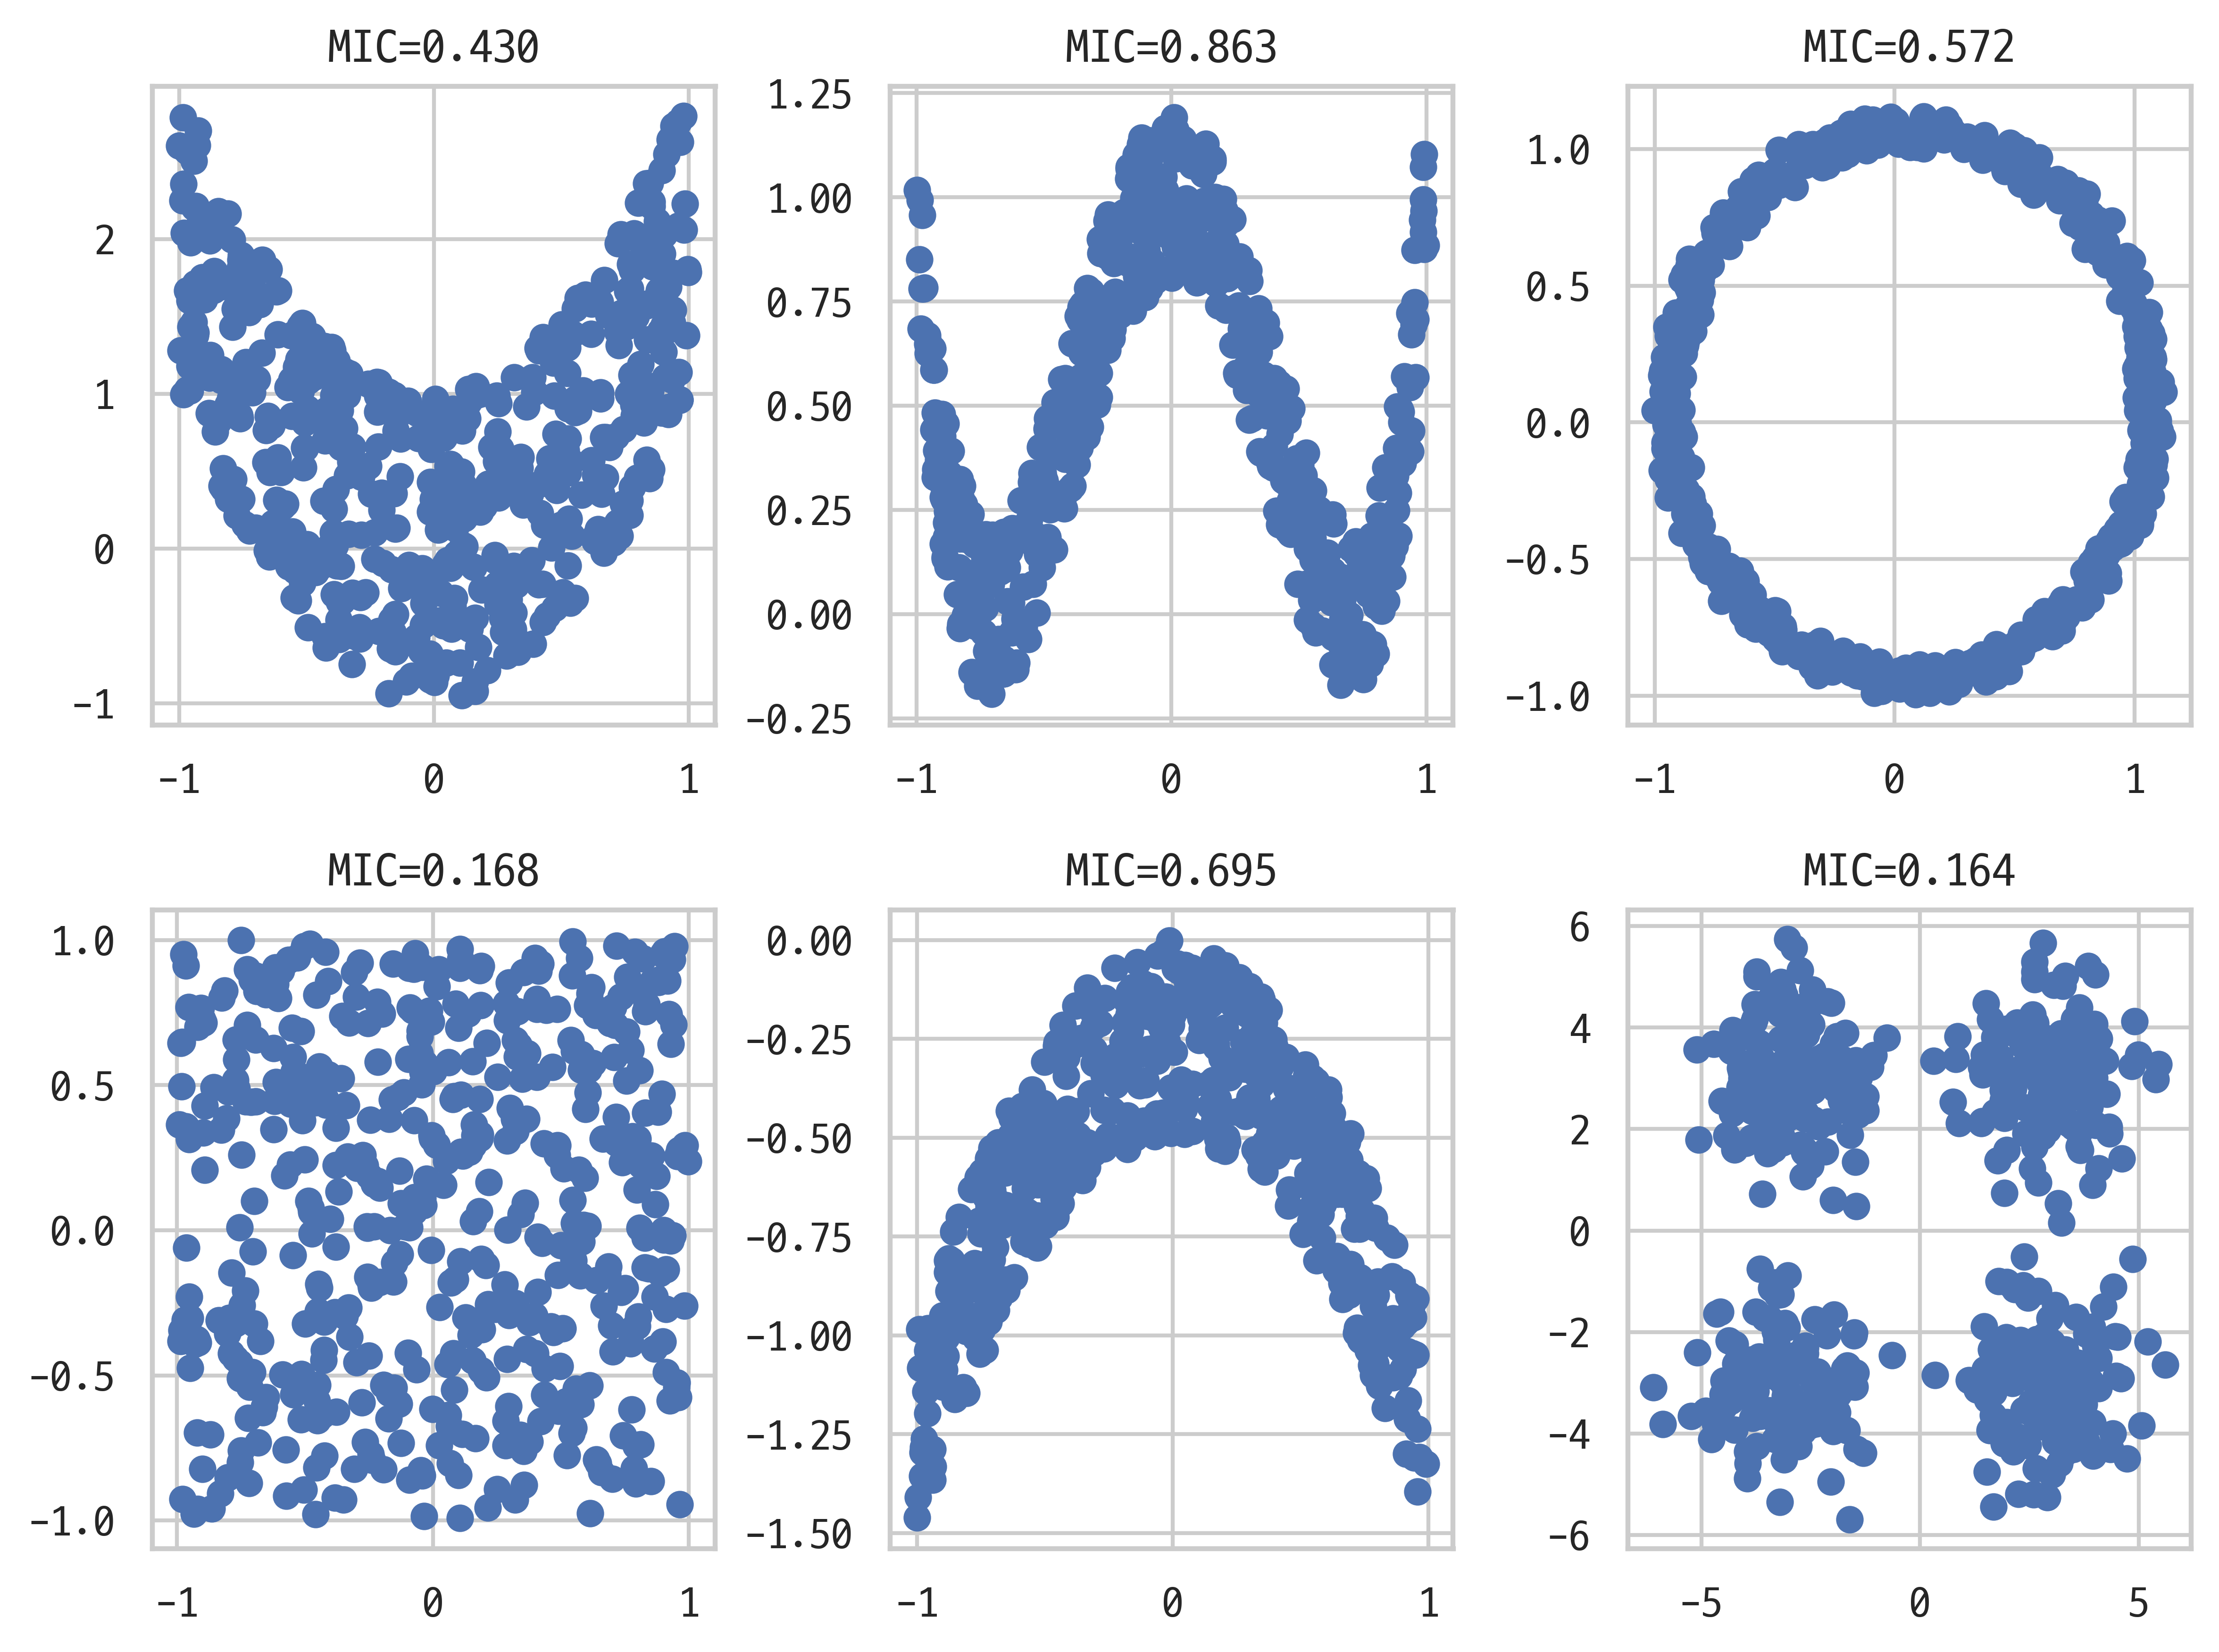

In [2]:
from minepy import MINE

mine = MINE()

n = 500

plt.figure(figsize=(8, 6))

plt.subplot(231)
x1 = np.random.uniform(-1, 1, n)
y1 = 2*x1**2 + np.random.uniform(-1, 1, n)
plt.scatter(x1, y1)
mine.compute_score(x1, y1)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(232)
x2 = np.random.uniform(-1, 1, n)
y2 = 4*(x2**2-0.5)**2 + np.random.uniform(-1, 1, n)/5
plt.scatter(x2, y2)
mine.compute_score(x2, y2)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(233)
x3 = np.random.uniform(-1, 1, n)
y3 = np.cos(x3 * np.pi) + np.random.uniform(0, 1/8, n)
x3 = np.sin(x3 * np.pi) + np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
mine.compute_score(x3, y3)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(234)
x4 = np.random.uniform(-1, 1, n)
y4 = np.random.uniform(-1, 1, n)
plt.scatter(x4, y4)
mine.compute_score(x4, y4)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(235)
x5 = np.random.uniform(-1, 1, n)
y5 = (x5**2 + np.random.uniform(0, 0.5, n)) * np.array([-1, 1])[np.random.randint(0, 1 + 1)]
plt.scatter(x5, y5)
mine.compute_score(x5, y5)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(236)
xy1 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], int(n/4))
xy2 = np.random.multivariate_normal([-3, 3], [[1, 0], [0, 1]], int(n/4))
xy3 = np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], int(n/4))
xy4 = np.random.multivariate_normal([3, -3], [[1, 0], [0, 1]], int(n/4))
xy = np.concatenate((xy1, xy2, xy3, xy4), axis=0)
x6 = xy[:, 0]
y6 = xy[:, 1]
plt.scatter(x6, y6)
mine.compute_score(x6, y6)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.tight_layout()
plt.show()